In [5]:
## https://towardsai.net/p/nlp/natural-language-processing-nlp-with-python-tutorial-for-beginners-1f54e610a1a0
## https://www.nltk.org/book/ch02.html
## https://towardsdatascience.com/tf-idf-for-document-ranking-from-scratch-in-python-on-real-world-dataset-796d339a4089
## https://okan.cloud/posts/2021-04-08-text-vectorization-using-python-term-document-matrix/
## https://www.cs.ucy.ac.cy/courses/EPL660/labs/LAB02/LAB02.pdf

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pandas as pd

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.corpus.gutenberg.fileids()

emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

[nltk_data] Downloading package gutenberg to /home/lucas/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /home/lucas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lucas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


192427

In [42]:
incidentes = pd.read_csv('/home/lucas/Documentos/workspace/data_science_R/data/Incidentes_GERAL_Remedy (Copiar) - 2022 Apr 28.csv', sep=';')
#word_tokenize(incidentes[['Motivo Status']])

#incidentes.apply(lambda row: word_tokenize(row['Motivo Status']), axis=1)
#incidentes["unigrams2"] = incidentes.apply(lambda row: word_tokenize(row['Motivo Status']), axis=1)
#type(incidentes['Motivo Status'])
subset = incidentes.iloc[0:4,]
#incidentes['Motivo Status']
#incidentes["unigrams"] = 
subset["unigrams"] = subset["Motivo Status"].apply(nltk.word_tokenize)

subset

<ipython-input-42-c09ccc390345>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["unigrams"] = subset["Motivo Status"].apply(nltk.word_tokenize)


,IDIncidente,Sumario,Prioridade,Tipo Incidente,Notas,Status,Motivo Status,Site,Empresa Designado,Organizacao Designado,...,Numero Ticket Fornecedor,SR Type Field 2,SR Type Field 18,SR Type Field 19,SR Type Field 29,Priorização,Primeira Empresa de Suporte,Primeira Organização de Suporte,Primeiro Grupo Suporte,unigrams
0,INC000007518985,FALHA NO SISTEMA LOJA ONLINE MOVEL,Média,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Nenhuma Ação Requerida,SP MTZ ECOBERRI,TELEFONICA VIVO,TI - SUSTENTACAO,...,NaN,4.026677e+10,NaN,1/3/2021,LOGIN,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT,"[Nenhuma, Ação, Requerida]"
1,INC000007520117,Risco Iminente do Kubernetes da Loja ficar ind...,Crítico,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Nenhuma Ação Requerida,SP CHUCRI ZAIDA,TELEFONICA VIVO,TI - PRODUCAO,...,NaN,1.195877e+10,NaN,1/3/2021,DEBITO TECNICO,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT,"[Nenhuma, Ação, Requerida]"
2,INC000007520149,FALHA NO SISTEMA LOJA ONLINE MOVEL,Média,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Improcedente,MG LJ UBERLANDI,TELEFONICA VIVO,TI - SUSTENTACAO,...,NaN,3.499915e+10,NAO,1/3/2021,COMPRA DE APARELHO,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT,[Improcedente]
3,INC000007520163,Falha ao acessar a Loja Online 6.7 apresentand...,Crítico,Restauração de Serviço do Usuário,#151504#\n*TI*\nQual o Tipo da Falha?: P3 - ER...,Fechado,Ação Corretiva Definitiva,SP DATA CENTER,TELEFONICA VIVO,TI - OPERACOES,...,NaN,NaN,NaN,NaN,NaN,NaN,TELEFONICA VIVO,TI - OPERACOES,COMMAND CENTER - MONITORACAO NEGOCIO,"[Ação, Corretiva, Definitiva]"


In [34]:
incidentes

,IDIncidente,Sumario,Prioridade,Tipo Incidente,Notas,Status,Motivo Status,Site,Empresa Designado,Organizacao Designado,...,Fornecedor,Numero Ticket Fornecedor,SR Type Field 2,SR Type Field 18,SR Type Field 19,SR Type Field 29,Priorização,Primeira Empresa de Suporte,Primeira Organização de Suporte,Primeiro Grupo Suporte
0,INC000007518985,FALHA NO SISTEMA LOJA ONLINE MOVEL,Média,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Nenhuma Ação Requerida,SP MTZ ECOBERRI,TELEFONICA VIVO,TI - SUSTENTACAO,...,NaN,NaN,4.026677e+10,NaN,1/3/2021,LOGIN,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT
1,INC000007520117,Risco Iminente do Kubernetes da Loja ficar ind...,Crítico,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Nenhuma Ação Requerida,SP CHUCRI ZAIDA,TELEFONICA VIVO,TI - PRODUCAO,...,NaN,NaN,1.195877e+10,NaN,1/3/2021,DEBITO TECNICO,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT
2,INC000007520149,FALHA NO SISTEMA LOJA ONLINE MOVEL,Média,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Improcedente,MG LJ UBERLANDI,TELEFONICA VIVO,TI - SUSTENTACAO,...,NaN,NaN,3.499915e+10,NAO,1/3/2021,COMPRA DE APARELHO,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT
3,INC000007520163,Falha ao acessar a Loja Online 6.7 apresentand...,Crítico,Restauração de Serviço do Usuário,#151504#\n*TI*\nQual o Tipo da Falha?: P3 - ER...,Fechado,Ação Corretiva Definitiva,SP DATA CENTER,TELEFONICA VIVO,TI - OPERACOES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TELEFONICA VIVO,TI - OPERACOES,COMMAND CENTER - MONITORACAO NEGOCIO
4,INC000007526315,Intermitência ao acessar a funcionalidade Troc...,Crítico,Restauração de Serviço do Usuário,#151501#\n*QD*\nCanal:: Meu Vivo Móvel App\nTi...,Fechado,Resolução Automatizada Informada,SP MTZ ECOBERRI,TELEFONICA VIVO,TI - OPERACOES,...,NaN,NaN,1.191148e+10,NaN,NaN,TROCA DE PLANO/APARELHO,NaN,TELEFONICA VIVO,TI - OPERACOES,COMMAND CENTER - DIGITAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,INC000008741207,FALHA NO SISTEMA LOJA ONLINE MOVEL,Média,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Improcedente,SP MTZ ECOBERRI,TELEFONICA VIVO,TI - SUSTENTACAO,...,NaN,NaN,1.199858e+10,NAO,29/6/2021,HOMEPAGE,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT
582,INC000008741244,FALHA NO SISTEMA LOJA ONLINE MOVEL,Média,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 1\nQual o ...,Fechado,Nenhuma Ação Requerida,SP MTZ ECOBERRI,TELEFONICA VIVO,TI - SUSTENTACAO,...,NaN,NaN,5.499980e+10,NaN,24/6/2021,COMPRA DE APARELHO,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT
583,INC000008741336,FALHA NO SISTEMA LOJA ONLINE MOVEL,Média,Restauração de Serviço do Usuário,Quantidade de Clientes Impactados:: 200\nQual ...,Fechado,Nenhuma Ação Requerida,SP MTZ ECOBERRI,TELEFONICA VIVO,TI - SUSTENTACAO,...,NaN,NaN,1.198107e+10,SIM,20/6/2021,COMPRA/TROCA DE PLANO LOJA ONLINE,NaN,TELEFONICA VIVO,TI - SUSTENTACAO,CANAIS DIGITAIS - LOJA ONLINE ASSINE VIVONEXT
584,INC000008742326,FALHA CRITICA EM SISTEMAS,Crítico,Restauração de Serviço do Usuário,#151501# *EC*\nQual o Tipo da Falha?: P3 - ER...,Fechado,Ação Corretiva Temporária,SP CHUCRI ZAIDA,TELEFONICA VIVO,TI - PRODUCAO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TELEFONICA VIVO,TI - PROCESSOS,GESTAO DE SERVICOS - REQUISICOES


In [2]:
emma

text = "God is Great! I won a lottery."
#print(sent_tokenize(text))
words = word_tokenize(text)

fdist = FreqDist(emma)
fdist.most_common(10)

stpwrd = stopwords.words("english")
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

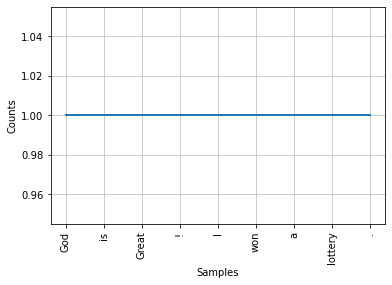

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
import matplotlib.pyplot as plt

fdist.plot(10)